### Decomposition of Project
* [Importing Libraries](#chapter)

1. Open the data file and Carry out exploratory data analysis (EDA)

2. Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method)

3. Plotting bar histograms and feature distributions for those who left (churn) and those who stayed

4. Building a correlation matrix.
      
 
* [Chapter 2: Build a model to predict user churn](#chapter2)

5. Dividing the data into train and validation sets using the train_test_split() function.

6. Training the model on the train set with two methods.

7. Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
    
    

    
    

* [Chapter 3: Create user clusters](#chapter3)

8. Standardize the data

9. Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

10. Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.

11.  Look at the mean feature values for clusters. Does anything catch your eye?

12. Plot distributions of features for the clusters. Do you notice anything?

13. Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?
    
    
    
* [Chapter 4: Conclusions](#chapter4)



### Chapter : Project description <a class="anchor" id="chapter"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage


### Chapter 1: Open the data file and Carry out exploratory data analysis (EDA) <a class="anchor" id="chapter1"></a>

#### Section 1.1: Open the data File <a class="anchor" id="section_1_1"></a>

In [2]:
gym_data = pd.read_csv('gym_churn_us.csv')

try:
    hypotheses=pd.read_csv('gym_churn_us.csv', sep=';')
except:
    hypotheses=pd.read_csv(r"C:\Users\engrz\Python Projects\practicum\Sprint_9 ML\gym_churn_us.csv")

In [3]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


#### Section 1.2: Carry out exploratory data analysis Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method). <a class="anchor" id="section_1_2"></a>

In [4]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
gym_data.loc[:, gym_data.isnull().any()].head()

""
0
1
2
3
4


### Conclusion

The describe() method shows there is no missing values in any columns. The data is fully processed for analysis.

There are total 14 columns and seven are categorical features. All the values are integer or float type.


The mean and standard deviation of categorical values tell the destribution for 1 or 0 category. For example the gender and partner columns mean values are around 50% which says that male/female ratio is almost same.  The partner mean tells that around 49% customers come from the partner companies.

Around 84% people lives near the gym location.

Around 90% people has given phone number.

Around 30% joined the gym with 'bring_friend' promo.

Around 41% customers took the group sessions.

The mean churn rate is 26% which is good but have possibility of improvement.

The contract period is around 4 and half months but it will be analyse for any outliers.

#### Section 1.3: Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method). <a class="anchor" id="section_1_3"></a>

In [7]:
churn_rate=gym_data.groupby('Churn').mean()
print(churn_rate)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

In [8]:
categorical_features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']

numerical_features = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
                      'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

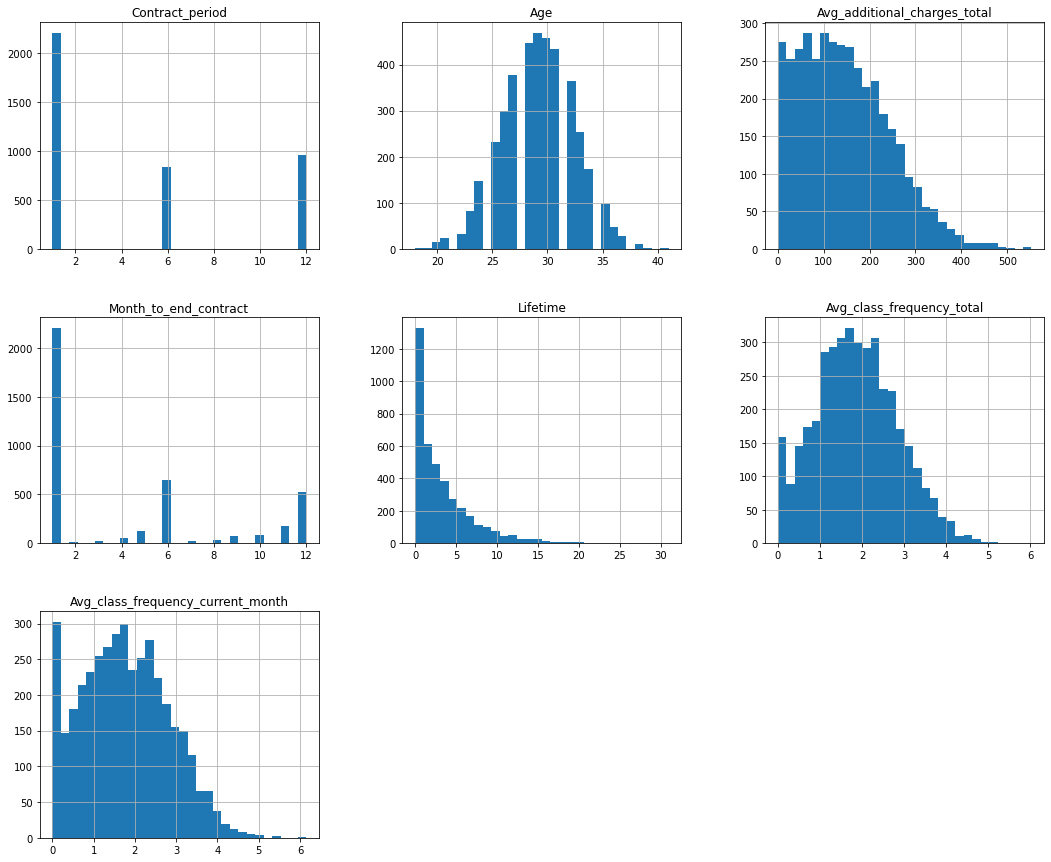

In [9]:

gym_data[numerical_features].hist(bins=30, figsize=(18, 15));

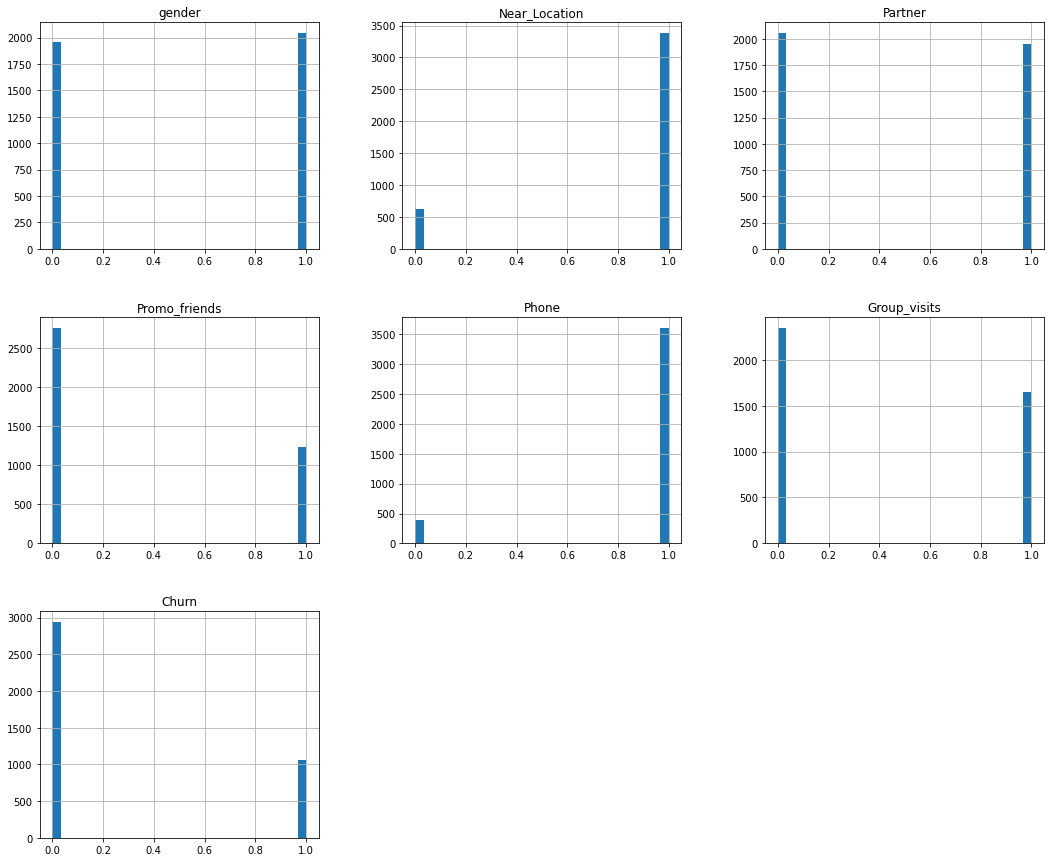

In [10]:
gym_data[categorical_features].hist(bins=30, figsize=(18, 15));

### Finding and Conclusion

The churn rate for the gender is same. 

The people living near to gym, come from partner company, join with friends or join group sessions have less churn rate compare to the livng away. 

The avg_class_frequency for people who left is higher than those who stayed. That's could be of high expectations or gradually decrease in interest.

#### Section 1.4: Plot bar histograms and feature distributions for those who left (churn) and those who stayed. <a class="anchor" id="section_1_4"></a>

The data is already separated into numerical_features and categorical_features

In [11]:
churn_rate

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [12]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


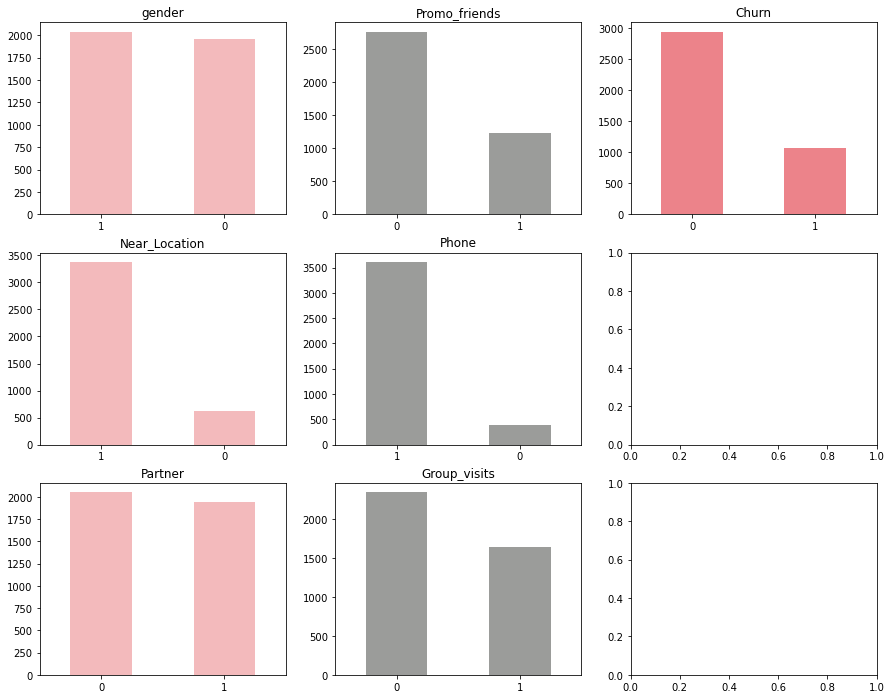

In [13]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (15,12))
for i, item in enumerate(categorical_features):
    if i < 3:
        ax = gym_data[item].value_counts().plot(
        kind = 'bar',ax=axes[i,0],
        rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = gym_data[item].value_counts().plot(
        kind = 'bar',ax=axes[i-3,1],
        rot = 0,color ='#9b9c9a')
        
    elif i < 7:
        ax = gym_data[item].value_counts().plot(
        kind = 'bar',ax=axes[i-6,2],rot = 0,
        color = '#ec838a')
    ax.set_title(item)

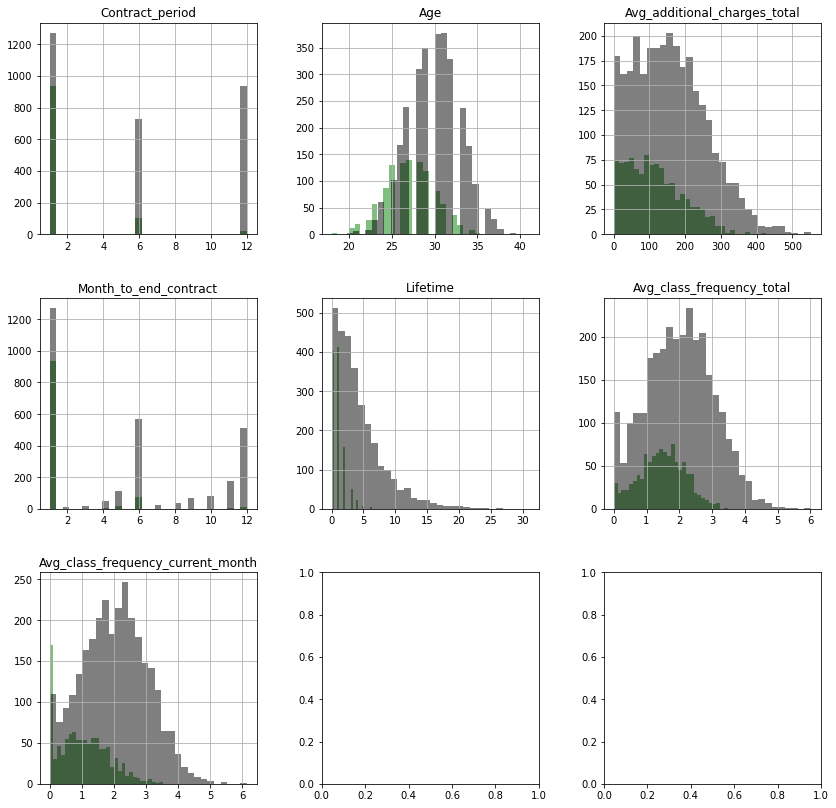

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(14, 14)) 
#gym_data[numerical_features].plot(subplots=True,ax=ax.flatten()[:7])

gym_data[gym_data.Churn == 1][numerical_features].hist(bins=30, color="green", alpha=0.5, ax=ax.flatten()[:7])
gym_data[gym_data.Churn == 0][numerical_features].hist(bins=30, color="black", alpha=0.5, ax=ax.flatten()[:7]);

### Finding and Conclusion
 Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
 

To plot the histograms, the categorical and numerical features were separated. The gender and partner features are almost equally divided for churn. 

The customers who  joined the group classes or came through promo_friends offer have high rate of stay. 

The location and phone number features don't have a high impact on churn. 

For the numerical features, mostly features have high impact on churn. Only the feature average classes has high opposite impact. i.e as many people are not coming to the gym (zero visits). This is a high number of customers and required special attention.


#### Section 1.5: Build a correlation matrix and display it. <a class="anchor" id="section_1_5"></a>

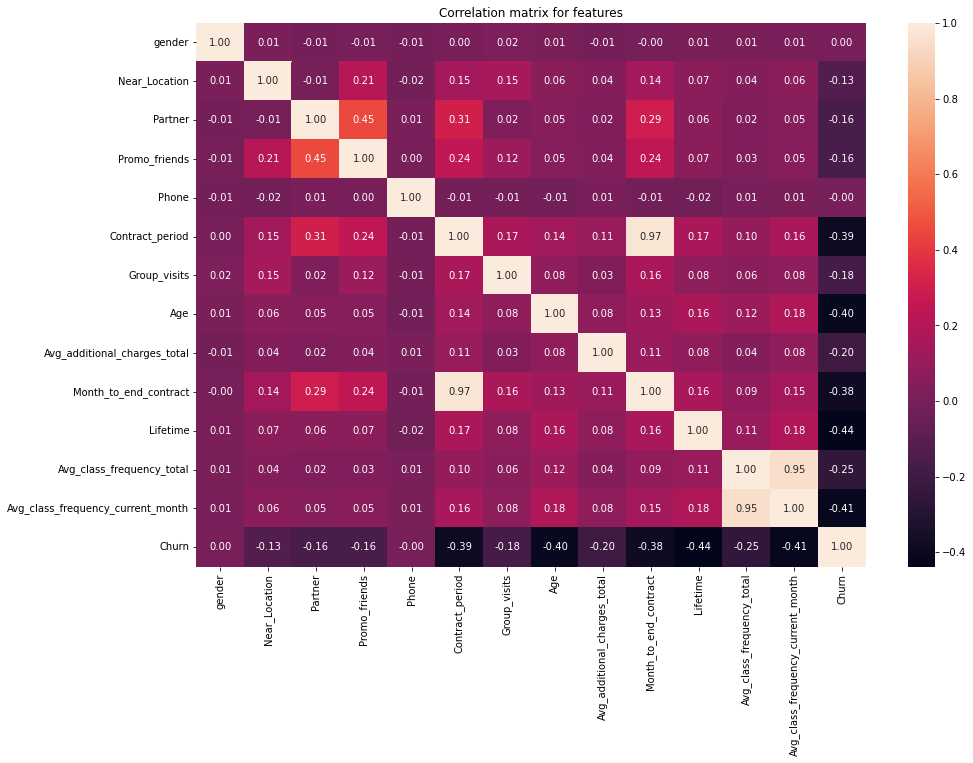

In [15]:
corr_matrix = gym_data.corr()
fig, ax = plt.subplots(figsize=(15,10))  
ax = plt.axes()

sns.heatmap(corr_matrix, annot = True , fmt=".2f", ax=ax);

ax.set_title('Correlation matrix for features')
plt.show()

### Conclusion

The correlation graphs for most of the features have very less correlation.  For example, value 0.16 for Contract_period and Avg_class_frequency_current_month don’t imply a very high correlation.

Many features have negative correlation which means that one factor increases while the other one decreases. So for example: The more often a customer goes to the gym, the lower his churn value is (low = 0, no churn). Or location: High value for near_location (1) and low value for churn (0).

The value of 0.45 for Partner-Promo_friends correlation shows that customers from partner companies also have invited their friends through Promo_friends offer.


### Chapter 2: Build a model to predict user churn<a class="anchor" id="chapter2"></a>

Build a binary classification model for customers where the target feature is the user's leaving next month.

Divide the data into train and validation sets using the train_test_split() function.

Train the model on the train set with two methods:

logistic regression

random forest

Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

Remember to indicate the random_state parameter when dividing data and defining the algorithm.

#### Section 2.1: Divide the data into train and validation sets using the train_test_split() function. <a class="anchor" id="section_2_1"></a>

In [16]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


In [17]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym_data.drop(['Churn','Month_to_end_contract',
                   'Avg_class_frequency_total',
                   'Avg_class_frequency_current_month',
                   'Phone',
                   'Avg_additional_charges_total'],
                  axis = 1)  # dropping the unnecessary columns and dividing the data  
y = gym_data['Churn']# targer variable

In [18]:
#splitting the dataset into train and test df

X_train, X_test,y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0)

### Conclusion

The data is separated by features and target variable(Churn). In the last step the data is divided into train and test part for further learning.

#### Section 2.2: Train the model on the train set with two methods <a class="anchor" id="section_2_2"></a>

__logistic regression__

__random forest__

In [19]:
#train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [20]:
 model = LogisticRegression()

In [21]:
#training the model

model.fit(X_train,y_train)

#trained model to predict

predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

In [22]:
np.count_nonzero(predictions)

198

In [23]:
len(predictions)

800

### random forest

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [25]:
rf_predictions = rf_model.predict(X_test_st)

rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

#### Section 2.3: Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results? <a class="anchor" id="section_2_3"></a>

In [26]:
# print the studied metrics for the resulting prediction of LogisticRegression
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.90
Precision: 0.80
Recall: 0.80
F1: 0.80


In [27]:
# print the studied metrics for the resulting prediction of random forest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.87
Precision: 0.74
Recall: 0.73
F1: 0.74


### Conclusion:

After analysis, the results show that Random Forest model has better results than Logistic Regression.

### Chapter 3: Create user clusters<a class="anchor" id="chapter3"></a>

#### Section 3.1: Standardize the data. <a class="anchor" id="section_3_1"></a>

In [28]:
X= gym_data.drop('Churn', axis=1)
y= gym_data['Churn']
 
# standardize the data
scaler = StandardScaler()
x_sc = scaler.fit_transform(X) 

The data is first separeted on features and target variable. After, it has standardize using the StandardScaler() features.

#### Section 3.2: Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out. <a class="anchor" id="section_3_2"></a>

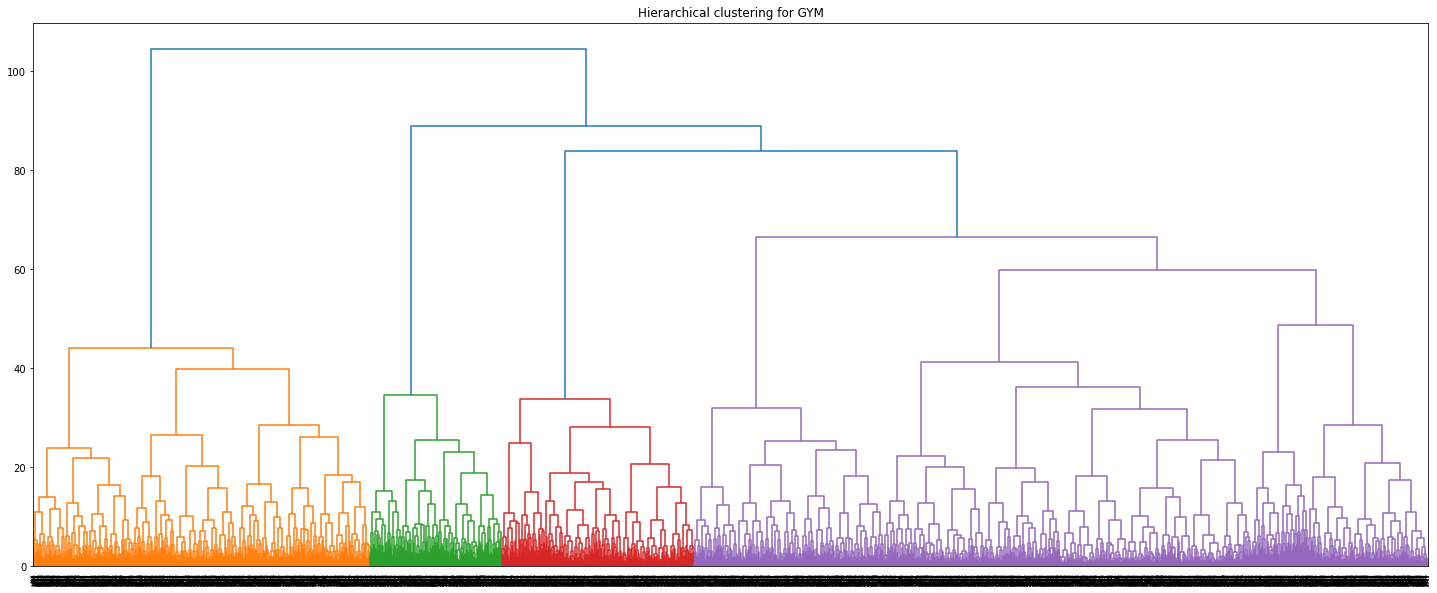

In [29]:
# linkage()
linked = linkage(x_sc, method = 'ward')
 
# print the dendogram
plt.figure(figsize=(25, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

### Conclusion

The linkage function is applied to build a matrix of distances based on the standardized feature matrix. The dendrogram graph has shoen data divided into 4 clusters. 

#### Section 3.3: Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)<a class="anchor" id="section_3_3"></a>

In [30]:
# defining the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
 
# prediction of the clusters for observations
labels = km.fit_predict(x_sc)

The model has trained with 5 number of clusters.

#### Section 3.4: Look at the mean feature values for clusters. Does anything catch your eye?<a class="anchor" id="section_3_4"></a>

In [31]:
 
# storing cluster labels in the field of our dataset
gym_data['cluster_Kmean'] = labels
 
# getting the statistics of the mean feature values per cluster
data_grouped = gym_data.groupby('cluster_Kmean').mean().reset_index()
 
# printing of the grouped clusters
data_grouped

,cluster_Kmean,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.558824,0.975294,0.348235,0.228235,1.0,2.582353,0.470588,30.116471,162.118435,2.384706,4.945882,2.821250,2.817100,0.071765
1,1,0.495050,0.000000,0.463366,0.079208,1.0,2.374257,0.217822,28.465347,135.224414,2.219802,2.809901,1.656137,1.472887,0.443564
2,2,0.486334,1.000000,0.354502,0.240354,1.0,1.962219,0.341640,28.155145,130.861326,1.868971,2.380225,1.237422,1.000602,0.518489
3,3,0.501478,0.960591,0.782266,0.574384,1.0,10.882759,0.540887,29.979310,160.817799,9.944828,4.723153,1.996640,1.989817,0.027586
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


### Conclusion

The churn rate for the 5th clusters is very high and the other features are also low i.e. the contract period is lowest compare to other cluster groups. Cluster 1 and cluster 3 have highest churn rate.

#### Section 3.5: Plot distributions of features for the clusters. Do you notice anything?<a class="anchor" id="section_3_5"></a>

In [32]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_Kmean
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,2


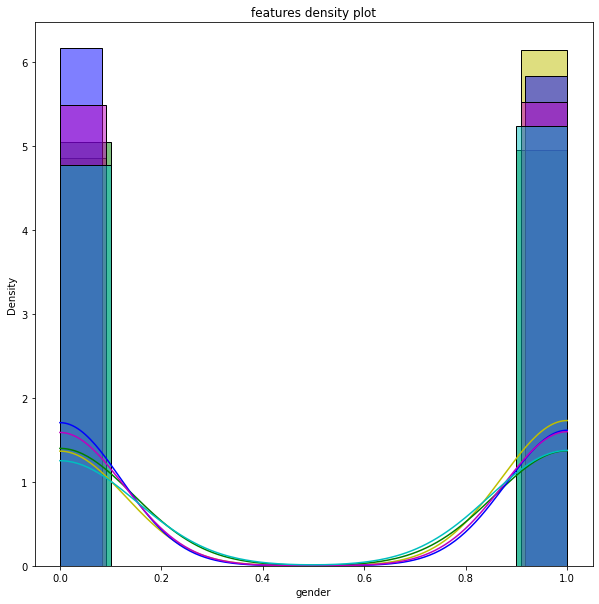

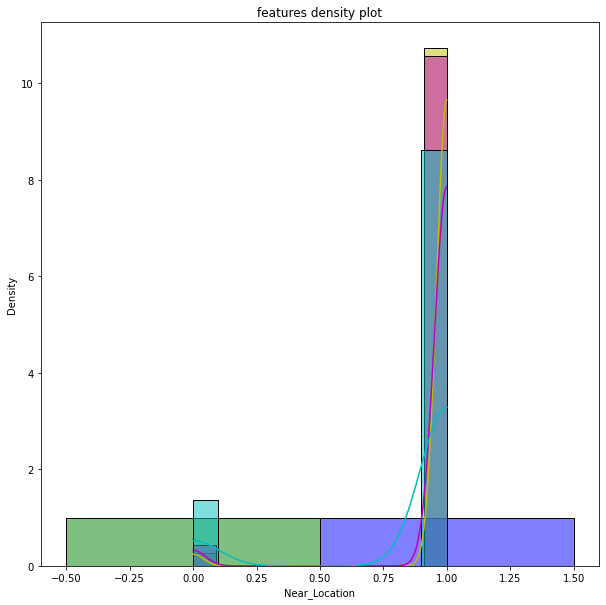

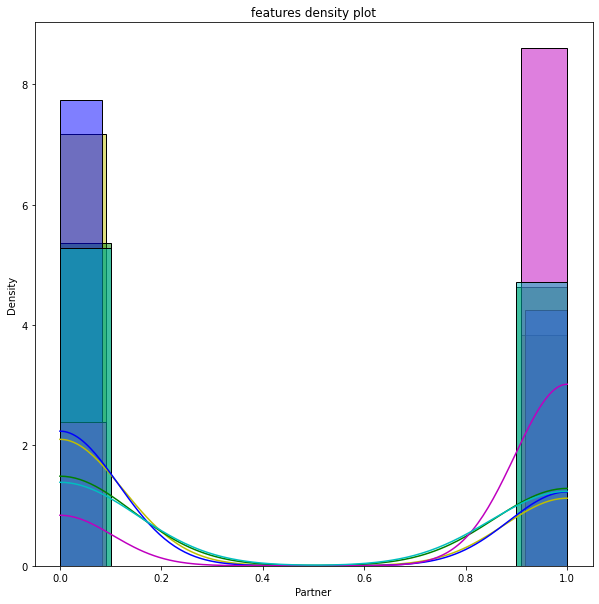

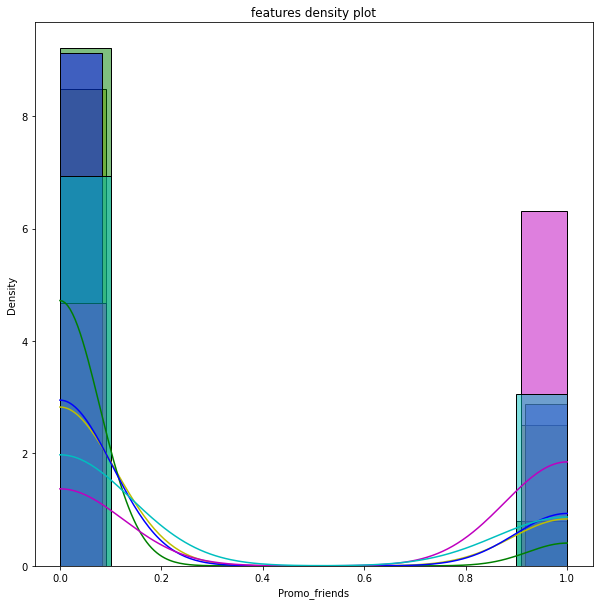

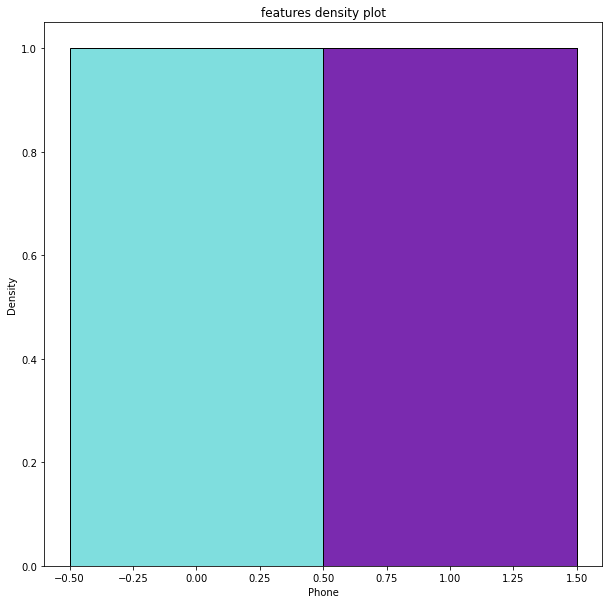

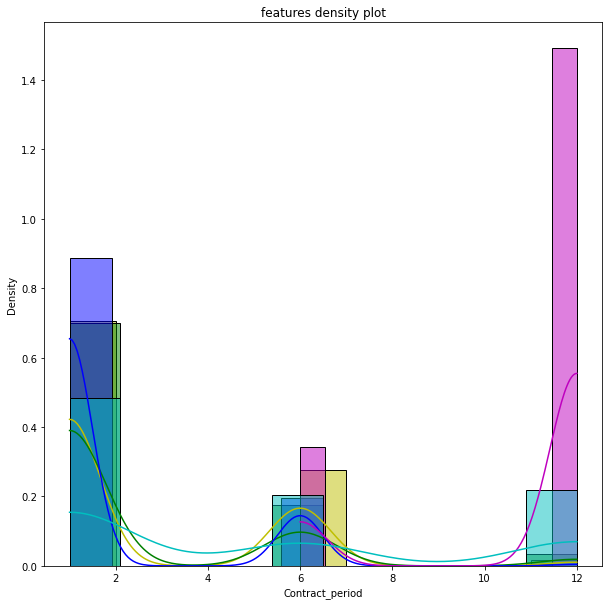

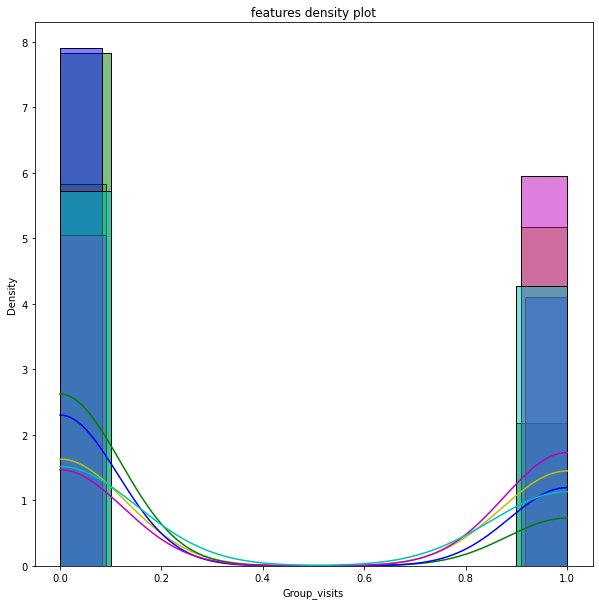

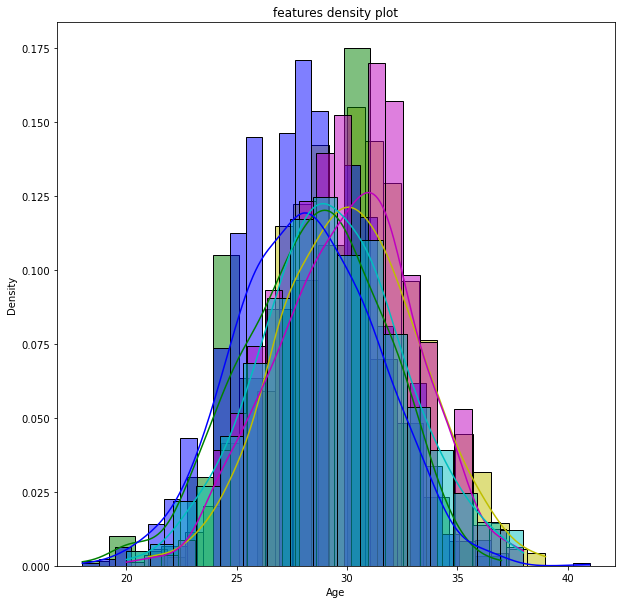

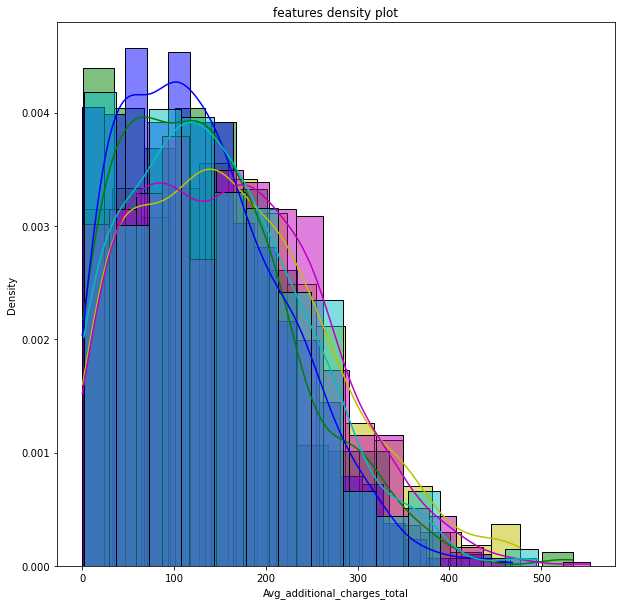

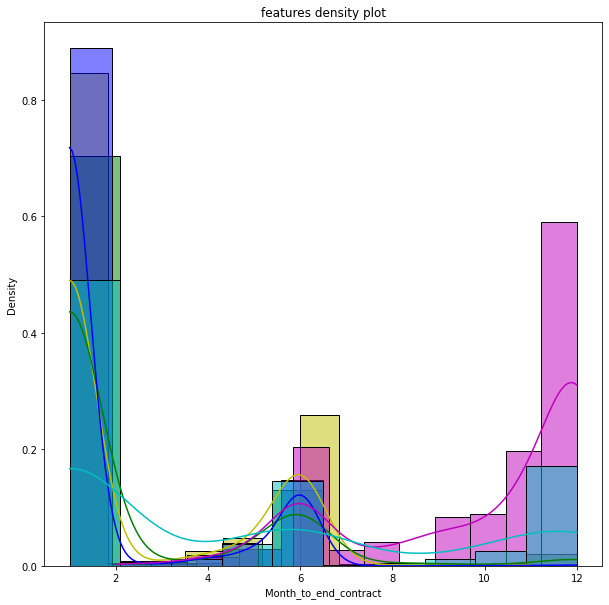

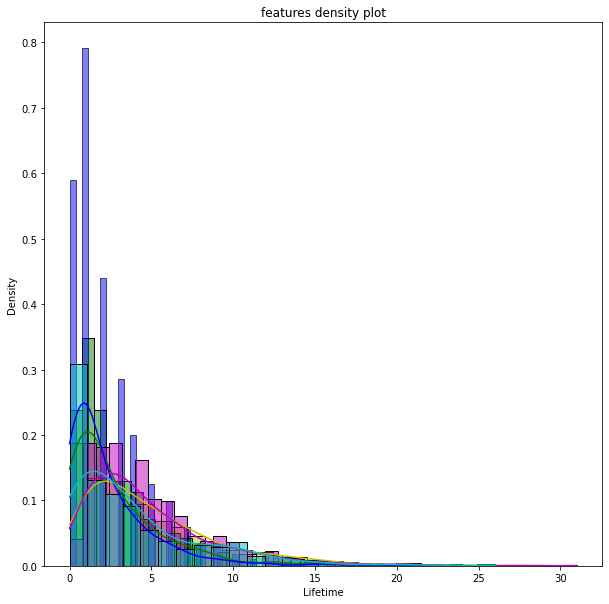

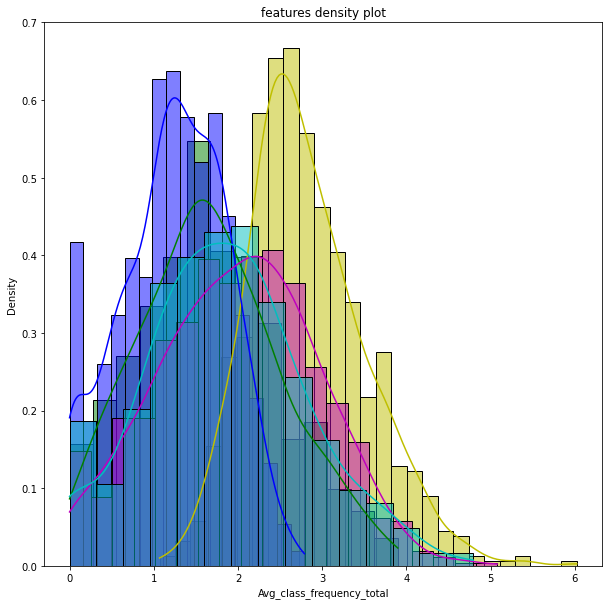

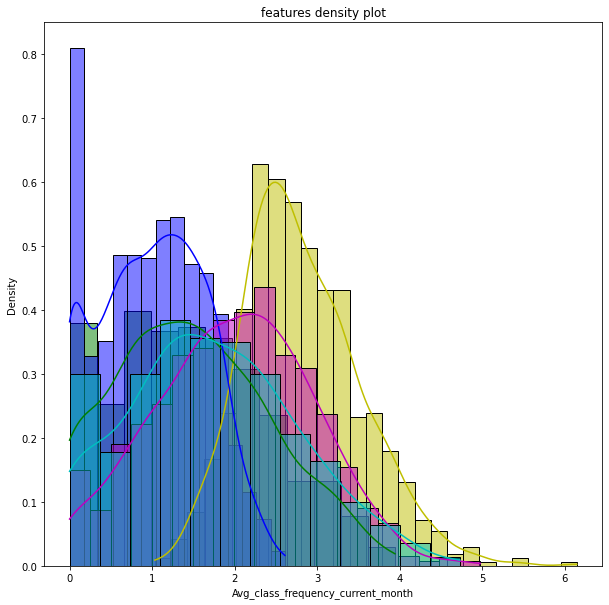

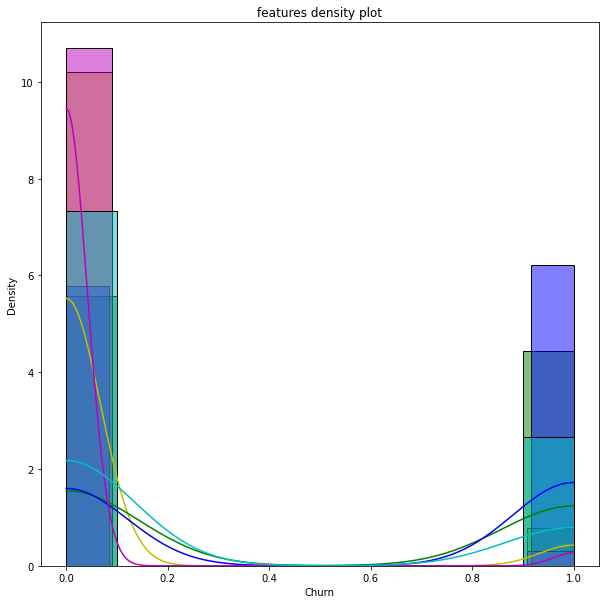

In [33]:
columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn']
# plotting all the features columns reference to the cluster_Kmean

for column in columns:
    plt.figure(figsize=(10,10))
    plt.title('features density plot')
    sns.histplot(gym_data[gym_data['cluster_Kmean'] == 0][column], kde=True, stat="density", color = 'y')
    sns.histplot(gym_data[gym_data['cluster_Kmean'] == 1][column], kde=True, stat="density", color = 'g')
    sns.histplot(gym_data[gym_data['cluster_Kmean'] == 2][column], kde=True, stat="density", color = 'b')
    sns.histplot(gym_data[gym_data['cluster_Kmean'] == 3][column], kde=True, stat="density", color = 'm')
    sns.histplot(gym_data[gym_data['cluster_Kmean'] == 4][column], kde=True, stat="density", color = 'c' )
    plt.show()
    

### Conclusion:

For the different cluster groups, the observations show mostly the churn for different clusters are low so people are mostly people are going to stay. That's a great news.

#### Section 3.6: Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?<a class="anchor" id="section_3_6"></a>

In [34]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_Kmean
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,2


In [35]:
cluster_churn = gym_data.query("Churn ==1")

In [36]:
cluster_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_Kmean
7,0,1,0,0,1,1,0,30,217.786641,1,0,1.213502,1.049387,1,2
11,1,1,1,0,1,1,0,27,266.783824,1,2,2.348535,1.584316,1,2
13,1,1,0,0,1,1,1,27,152.748669,1,1,0.000000,0.000000,1,2
21,0,0,0,0,1,1,0,30,153.198594,1,3,0.636382,0.000000,1,1
23,1,1,0,0,1,1,1,32,276.079882,1,1,1.420637,1.043101,1,2


In [37]:
gym_churn =  cluster_churn.groupby('cluster_Kmean')['Churn'].count()

In [38]:
gym_churn.reset_index(name='churn_count')

,cluster_Kmean,churn_count
0,0,61
1,1,224
2,2,645
3,3,28
4,4,103


In [39]:
cluster_not_churn = gym_data.query("Churn ==0")
gym_not_churn =  cluster_not_churn.groupby('cluster_Kmean')['Churn'].count()

In [40]:
gym_not_churn.reset_index(name='not_churn_count')

,cluster_Kmean,not_churn_count
0,0,789
1,1,281
2,2,599
3,3,987
4,4,283


dataset combine 

In [41]:
gym_churn_data = gym_churn.to_frame().merge(gym_not_churn, on  = 'cluster_Kmean').reset_index()

In [42]:
gym_churn_data

,cluster_Kmean,Churn_x,Churn_y
0,0,61,789
1,1,224,281
2,2,645,599
3,3,28,987
4,4,103,283


In [43]:
gym_churn_data.columns = ['cluster_Kmean','churn','not_churn']
gym_churn_data['total'] = gym_churn_data['not_churn'] + gym_churn_data['churn']

In [44]:
gym_churn_data
gym_churn_data['%_not_churn'] = round((gym_churn_data['not_churn']/gym_churn_data['total']), 2)
gym_churn_data['%_churn'] = round((gym_churn_data['churn']/gym_churn_data['total']), 2)

In [45]:
gym_churn_data

,cluster_Kmean,churn,not_churn,total,%_not_churn,%_churn
0,0,61,789,850,0.93,0.07
1,1,224,281,505,0.56,0.44
2,2,645,599,1244,0.48,0.52
3,3,28,987,1015,0.97,0.03
4,4,103,283,386,0.73,0.27


In [46]:
gym_churn_data=gym_churn_data.drop(columns='total')

In [47]:
gym_churn_data

,cluster_Kmean,churn,not_churn,%_not_churn,%_churn
0,0,61,789,0.93,0.07
1,1,224,281,0.56,0.44
2,2,645,599,0.48,0.52
3,3,28,987,0.97,0.03
4,4,103,283,0.73,0.27


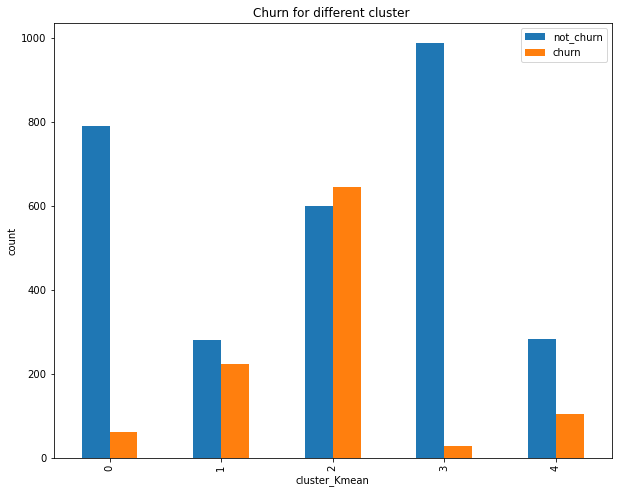

In [48]:

gym_churn_data.plot(x="cluster_Kmean", y=["not_churn", "churn"], kind = 'bar', 
                    figsize=(10,8),
                   title= 'Churn for different cluster ',
                   ylabel = 'count');


### Conclusion:

The plot of churn and not churn data for different cluster show that, cluster 3 has (x_label-3) has highest churn rate compare to other cluster. The cluster 2 (x_label-1) has highest customer loyality and will be staying more compare to the other cluster groups. So cluster 3 and 4 require attention but other are performing good.  

### Chapter 4: Conclusion <a class="anchor" id="chapter4"></a>


#### Conclusion

__Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.__

In the first chapter of the data file was imprted which has 14 columns which has caregorical and numerical values. The data was preprocessed and found no missing values. All the datatypes were corrected and not required any formatting.

In second chapter the, the mean and standard deviation of categorical values tell the destribution for 1 or 0 category. For example the gender and partner columns mean values are around 50% which says that male/female ratio is almost same. The partner mean tells that around 49% customers come from the partner companies. Around 84% people lives near the gym location. Around 90% people has given phone number. Around 30% joined the gym with 'bring_friend' promo. Around 41% customers took the group sessions. The mean churn rate is 26% which is good but have possibility of improvement. The contract period is around 4 and half months but it will be analyse for any outliers.

In second chapter, the logistic and random forest models were performed and found that the random forest model has performed better than logistics analysis for the given dataset.

In the last chapter, the data was standardize for the K-means algorithm, the dendrogram was plotted to find out the number of clustes. It was recommended to use five clusters. The plot of churn and not churn data for different cluster show that, cluster 3 has (x_label-3) has highest churn rate compare to other cluster. The cluster 2 (x_label-1) has highest customer loyality and will be staying more compare to the other cluster groups. So cluster 3 and 4 require attention but other are performing good.

In [49]:
data_grouped

,cluster_Kmean,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.558824,0.975294,0.348235,0.228235,1.0,2.582353,0.470588,30.116471,162.118435,2.384706,4.945882,2.821250,2.817100,0.071765
1,1,0.495050,0.000000,0.463366,0.079208,1.0,2.374257,0.217822,28.465347,135.224414,2.219802,2.809901,1.656137,1.472887,0.443564
2,2,0.486334,1.000000,0.354502,0.240354,1.0,1.962219,0.341640,28.155145,130.861326,1.868971,2.380225,1.237422,1.000602,0.518489
3,3,0.501478,0.960591,0.782266,0.574384,1.0,10.882759,0.540887,29.979310,160.817799,9.944828,4.723153,1.996640,1.989817,0.027586
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


#### Recommendations:



The analysis has found that the cluster 1 has highest customers loayality/retention. Mostly customers from this customers are satisfied from the services. The results of this cluster showed that male and female propotions are same for this group, and group sessions also almost same so these two features don't really affect the customers rentention. 

The contract_period is a key finding which demonstrate that customers are more interested in short term contracts. They also have spent second highest for other activities i.e. cafe, shakes, training etc.

So an execellent pacakge would be a short-term contract with offers in cafes and training sessions.